<a href="https://colab.research.google.com/github/Richmaninoff/trabajo-PLN-python/blob/main/El_poder_del_fact_checking_Bardales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

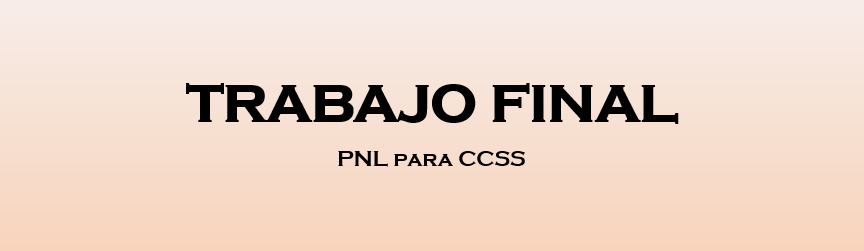

#**La verdad durante la tormenta: el poder del fact-checking en Medios de comunicación durante tiempos de polarización**






##Tema:

¿De qué manera los medios de comunicación Ojo Público y La República emplearon el fact checking en el último contexto de polarización?


El objetivo de la investigación es identificar
qué temas abordarón Ojo Público y La República mediante el uso del Fact Checking en el última crisis política (2021-2023). Se plantea evaluar hasta que punto estos medios han tenido la intención de combatir las Fake News. La hipótesis es que la herramienta analítica antes mencionada es proclive de usarse dependiendo de los discursos a los que favorece, ya que, los medios de comunicación tienen la capacidad de intensificar los contextos de polarización.


##Justificación:


Los contextos de polarización pueden exhibir notablemente la influencia discursiva de los actores políticos. En este sentido, es menester analizar la performance de los distintos actores, como los medios de comunicación, cuyo mayor rol es proporcionar información. Aún más, si contemplamos el contexto de creciente expansión de las fake news difundidas por medio de discursos debemos entender cómo estos emplean métodos o incluso, manipulan. Al analizar Ojo Público y La República podremos reconocer como desarrollaron su performance, con lo cual entenderemos que tan pertinentes han sido para fomentar el dialogo sin mayores sesgos cuestión importante desde la perspectiva ciudadana. Del mismo modo, permitirá entender el uso de nuevos métodos para generar información fiable, cuya relevancia recae en los estudios de legitimidad de los procesos democráticos actuales.

##Corpus:

Los documentos se han obtenido de la red social Twitter. El primer archivo contiende tweets de La República tiene posee 398654 y el segundo, referido a Ojo público, 77463. Estos son documentos en bruto que serán filtrados a un periodo delimitado (desde 2021 en adelante) y por palabras clave que referencian el uso del fact checking

In [ ]:
#conectar mi colap con mi carpeta de trabjo
from google.colab import drive

In [ ]:
#montando el drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#importando os, para manipular el directorio
import os

In [ ]:
os.chdir("/content/drive/MyDrive/LenguajePython ")

In [ ]:
# IMPORTANDO LOS PAQUETES NECESARIOS
import pandas as pd
import numpy as np
import os
import csv
import datetime
import json
import re
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from nltk.corpus import stopwords # nltk = package for human language data processing.
import os
import csv
import datetime
import json
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###SUBIENDO DATA

In [ ]:
with open("LR.json", "r") as larepublica: #se importa la data del diario la republica
    LaRepublica = json.load(larepublica)
print(len(LaRepublica))
df1=pd.DataFrame(LaRepublica)

398654


In [ ]:
with open("OP.json", "r") as ojopublico: #se importa la data de ojo publico
    OjoPublico = json.load(ojopublico)
print(len(OjoPublico))
df2 = pd.DataFrame(OjoPublico)

77463


##ANÁLISIS
A continucación se va realizar un topic analysis para cada Data Frame de manera diferenciada. El punto es encontrar los temas que abordan estos medios de comunicación de modo que se exhiban qué aspectos se enfocan en discutir veracidades o, por si mismo, en cuáles se hace necesesacio utilizar el fect checking.

Para ambos casos se va a realizar el siguente procedimiento.

###PROCEDIMIENTOS

- **Limpieza previa**: Eliminación los acentos
- Se convierte a minuscula
- Se cargan y eliminan stop words
- Dividición en palabras individuales
- Se eliminan las ocurrencias de nueva línea
- se eliminan los parentesis teniendo como resultado una nueva columna con texto limpio
- Elimanción de caracteres especiales como \)\[\]‐#@

- **Aplicación de filtros**: Se aplican las funciones y filtros iniciales
- Se muestra la tabla del texto antes y otro despues

- Delimitación del periodo
- Se muestra el contenido fecha antes del cambio
- Cambio del formato a fecha
- Se muestra el contenido fecha antes del cambio
- Aplicación del filtro desde el 2021 (abarca todo el 2021 hasta 09 de febrero de 2023)
- Visualización de la tabla filtrado por fechas con el texto antes y otro despues

- Filtro por palabras

- se crea una lista de términos que se van a incluir
- Aplicación del filtro con el objeto lista
- Visualización de la columna con el filtro de palabras

- **Tokenización y generación de la gráfica**: se genera la matriz numerica
- Visualización  los terminos que aparecen y la frecuencia con la que aparecen

- Lista de todas las palabras, con el numero total de palabras
- La lista de palabras se almacena en "words".

- Ajuste del modelo NMF con 3 componentes para encontrar patrones latentes, que sean pocos responde a la cantidad del corpus filtrado
- Se imprimen los 10 terminos más importantes ordenados segun su peso en el componente
- Se aplica t-SNE para reducir la dimensionalidad de los datos
- Creaación del gráfico de dispersión con colores y etiquetas temáticas
- Adición de etiquetas temáticas al gráfico


###OJO PÚBLICO

In [ ]:
df2

,id,text,created_at,author,type,metrics,texto_respuesta,inicio_politician
0,"""1623820825320206336""","""#Apur\u00edmac | Esta tarde se dio un enfrent...","""2023-02-09T23:07:08.000Z""","""2582629795""","""replied_to""","{'retweet_count': 34, 'reply_count': 6, 'like_...","""#\u00c1ncash | Trabajadores de construcci\u00...",NaN
1,"""1623820468263215105""","""\ud83d\udccdMarcha en #Lima: diversos colecti...","""2023-02-09T23:05:43.000Z""","""2582629795""","""original""","{'retweet_count': 108, 'reply_count': 15, 'lik...",NaN,NaN
2,"""1623814573844201473""","""#\u00c1ncash | Trabajadores de construcci\u00...","""2023-02-09T22:42:18.000Z""","""2582629795""","""replied_to""","{'retweet_count': 34, 'reply_count': 2, 'like_...","""En #Arequipa inici\u00f3 el paro nacional con...",NaN
3,"""1623812123829714948""","""Asimismo, existen 2.100 personas en situaci\u...","""2023-02-09T22:32:33.000Z""","""2582629795""","""replied_to""","{'retweet_count': 14, 'reply_count': 0, 'like_...","""El congresista Jorge Morante y la CDL han imp...",NaN
4,"""1623812120398659584""","""El congresista Jorge Morante y la CDL han imp...","""2023-02-09T22:32:33.000Z""","""2582629795""","""original""","{'retweet_count': 126, 'reply_count': 5, 'like...",NaN,NaN
...,...,...,...,...,...,...,...,...
77458,"""683393374980845569""","""#Schydlowsky: el hombre que fiscalizaba los b...","""2016-01-02T21:04:12.000Z""","""2582629795""","""original""","{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,NaN
77459,"""683383272047521793""","""La historia de @Ojo_Publico, un emprendimient...","""2016-01-02T20:24:03.000Z""","""18021194""","""retweeted""","{'retweet_count': 11, 'reply_count': 0, 'like_...",NaN,NaN
77460,"""683336607399804928""","""El derecho de los pueblos ind\u00edgenas a pe...","""2016-01-02T17:18:37.000Z""","""303193976""","""retweeted""","{'retweet_count': 5, 'reply_count': 0, 'like_c...",NaN,NaN
77461,"""682745677848428545""","""Feliz 2016 @ACTransparencia @neutralito @UEen...","""2016-01-01T02:10:29.000Z""","""2505906176""","""retweeted""","{'retweet_count': 2, 'reply_count': 0, 'like_c...",NaN,NaN


In [ ]:
def clean_accents(tweet): #la función "clean_accents" reemplaza caracteres acentuados en un tweet.
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)
    #tweet = re.sub(r"[\u00ed]", "i", tweet)

    return tweet



In [ ]:
#para reemplazar varios caracteres de puntuación por espacios en blanco
f1 = lambda x: re.sub('[,\.!?:/@"]', ' ', x)

#convierte a una cadena de texto en minúsculas.
f2 = lambda x: str(x).lower()



In [ ]:
nuevos_stopwords = ['https', 'rt', 't', 'co', 'htp']
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop= stopwords.words("spanish")
#stop.extend(['https', 'rt', 't', 'co', 'htp'])
stop.extend(nuevos_stopwords)
stop = [word.lower() for word in stop]
f3 = lambda x: ' '.join(w for w in x.split() if w.lower() not in stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
df2['text'] = df2['text'].astype(str)

In [ ]:
def remove_words(text):
    pattern = r'\b\w*[aeiou][0-9]\w*\b'  # elimina palabras que contienen una vocal+número
    return re.sub(pattern, '', text)
# Aplicar la función a la columna 'col2'
df2['text'] = df2['text'].apply(remove_words)

In [ ]:
f4 = lambda x: ' '.join(w for w in x.split() if len(w)>3) #dividir en palabras individuales

In [ ]:
df2['text'] = df2['text'].str.replace('\n', ' ') #" se eliminan las ocurrencias de nueva línea

In [ ]:
#se eliminan los parentesis teniendo como resultado una nueva columna con texto limpio
df2['text_clean'] = df2['text'].str.replace('\(', " ", regex=True).str.replace('\)', " ", regex=True)

In [ ]:
#elimando caracteres especiales como \)\[\]‐#@
df2['text_clean'] = df2['text_clean'].str.replace('[\)\[\]‐#@]', " ", regex=True)

In [ ]:
#se aplican las funciones excepto la f1
df2['text_clean'] =df2['text_clean'].apply(f2).apply(f3).apply(f4).apply(clean_accents).apply(remove_words) #apply(f1)

In [ ]:
#se aplican todas ahora sí
df2['text_clean'] =df2['text_clean'].apply(f1).apply(f2).apply(f3).apply(f4).apply(clean_accents).apply(remove_words)

In [ ]:
df2[['text','text_clean']] #se muestra la tabla del df con el texto antes y otro despues

,text,text_clean
0,"""#Apur\ | Esta tarde se dio un enfrentamiento ...",apur\ tarde enfrentamiento manifestantes polic...
1,"""\ud83d\udccdMarcha en #Lima: diversos colecti...",\ud83d\udccdmarcha lima diversos colectivos co...
2,"""#\ | Trabajadores de construcci\ civil realiz...",trabajadores construcci\ civil realizar\ tarde...
3,"""Asimismo, existen 2.100 personas en situaci\ ...",asimismo existen personas situaci\ contacto in...
4,"""El congresista Jorge Morante y la CDL han imp...",congresista jorge morante impulsado campa\ pue...
...,...,...
77458,"""#Schydlowsky: el hombre que fiscalizaba los b...",schydlowsky hombre fiscalizaba bancos avi\ aj9...
77459,"""La historia de @Ojo_Publico, un emprendimient...",historia ojo_publico emprendimiento digital ex...
77460,"""El derecho de los pueblos ind\ a permanecer e...",derecho pueblos ind\ permanecer aislamiento yn...
77461,"""Feliz 2016 @ACTransparencia @neutralito @UEen...",feliz 2016 actransparencia neutralito ueenperu...


##observación:
en este punto se encontró que los archivos json cargados tenían una deficiencia con respecto a los caracteres *unicode*, con palabras como "Apur\u00edmac" que asumian cierto caracter por la acentuación "í". Por lo que se decidió dar solución a esta limitación. Pero, no hubo mayor éxito. A conituación algunos de los intentos.

```
f_unicode = lambda x: re.sub('[#Apur\u00edmac]', 'i', x)

df2['text'] = df2['text'].str.replac
('"#Apur\u00edmac', 'i') def f_unicode(text):
return re.sub(r"\u00ed", "i", text)

df2["text"] = df["text"].apply(lambda x: x.encode('utf-8').decode('unicode_escape'))
print(df2)

df2["text"] = df["text"].apply(lambda x: x.encode('iso-8859-1').decode('unicode_escape').encode('iso-8859-1').decode('iso-8859-1'))
```



###Delimitando periodo
se ha creido conveniente delimitar el periodo de los tweets desde el 2021 - 2023.

In [ ]:
df2.info () #que caracteres tiene nuestro df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77463 entries, 0 to 77462
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 77462 non-null  object
 1   text               77463 non-null  object
 2   created_at         77462 non-null  object
 3   author             77462 non-null  object
 4   type               77462 non-null  object
 5   metrics            77463 non-null  object
 6   texto_respuesta    12616 non-null  object
 7   inicio_politician  1 non-null      object
 8   text_clean         77463 non-null  object
dtypes: object(9)
memory usage: 5.3+ MB


In [ ]:
print(df2.iloc[100]['created_at']) #para ver una fecha


"2023-02-06T19:05:03.000Z"


In [ ]:
df2['created_at'] = pd.to_datetime(df2['created_at'], #cambiando el formato a fecha
format='"%Y-%m-%dT%H:%M:%S.%fZ"')
#"2023-02-09T23:07:08.000Z"

In [ ]:
print(df2.iloc[100]['created_at']) #viendo un ejemplo de la fecha

2023-02-06 19:05:03


In [ ]:
#se aplica el filtro desde el 2021 (abarca todo el 2021 hasta 09 de febrero de 2023)
fecha_filtro = pd.to_datetime('2021-01-01 00:00:00')
df2_filtrado1 = df2.loc[df2['created_at'] >= fecha_filtro]

In [ ]:
#se muestra la tabla del df filtrado por fechas con el texto antes y otro despues
df2_filtrado1[['text','text_clean','created_at']]

,text,text_clean,created_at
0,"""#Apur\ | Esta tarde se dio un enfrentamiento ...",apur\ tarde enfrentamiento manifestantes polic...,2023-02-09 23:07:08
1,"""\ud83d\udccdMarcha en #Lima: diversos colecti...",\ud83d\udccdmarcha lima diversos colectivos co...,2023-02-09 23:05:43
2,"""#\ | Trabajadores de construcci\ civil realiz...",trabajadores construcci\ civil realizar\ tarde...,2023-02-09 22:42:18
3,"""Asimismo, existen 2.100 personas en situaci\ ...",asimismo existen personas situaci\ contacto in...,2023-02-09 22:32:33
4,"""El congresista Jorge Morante y la CDL han imp...",congresista jorge morante impulsado campa\ pue...,2023-02-09 22:32:33
...,...,...,...
31274,"""#Covid19 En Tumbes, Piura, Lambayeque, La Lib...",covid19 tumbes piura lambayeque libertad arequ...,2021-01-01 01:00:01
31275,"""#OjoAlDato Hasta el 17 de enero, la inmoviliz...",ojoaldato enero inmovilizaci\ social obligator...,2021-01-01 00:40:00
31276,"""#Covid19 Para celebrar dentro del hogar, si h...",covid19 celebrar dentro hogar integrantes fami...,2021-01-01 00:27:39
31277,"""#Covid19 El gobierno dispuso que las celebrac...",covid19 gobierno dispuso celebraciones nuevo r...,2021-01-01 00:27:38


###filtro por palabras
se van a considerar los tweets que contengan las siguientes palabras:Factchecking y verifica



In [ ]:
lista_terminos=["Factchecking","verifica"] #crando una lista de términos
#lista_terminos=["Factchecking"]
#con esto se aplica el filtro con el objeto lista
filtro_palbras = df2_filtrado1["text_clean"].str.contains("|".join(lista_terminos))
#se crea la columna con el filtro de palabras
df2_filtrado2 = df2_filtrado1[filtro_palbras]


In [ ]:
#se muestra la tabla del df filtrado por fechas y términos con el texto
df2_filtrado2[["text","text_clean","created_at"]]

,text,text_clean,created_at
195,"""#TerritorioAmazonas El @OEFAperu inform\ que ...",territorioamazonas oefaperu inform\ est\ super...,2023-02-03 16:05:46
409,"""#Factchecking El video viral tambi\ fue usado...",factchecking video viral tambi\ usado hace ver...,2023-01-26 01:13:34
429,"""#Factchecking El Secretario para las Comunica...",factchecking secretario comunicaciones prensa ...,2023-01-25 00:56:55
504,"""Dos horas despu\ de la intervenci\, el Minist...",horas despu\ intervenci\ ministerio fiscaliape...,2023-01-22 23:45:13
514,"""\ud83d\udccc A las 11.35 a. m., dos horas des...",\ud83d\udccc horas despu\ intervenci\ fiscalia...,2023-01-22 17:05:56
...,...,...,...
31095,"""Lee y comparte solo informaci\ verificada. Ac...",comparte solo informaci\ verificada accede res...,2021-01-06 21:00:00
31103,"""Con la pandemia muchas cosas han cambiado, pe...",pandemia muchas cosas cambiado necesidad acced...,2021-01-06 20:00:00
31183,"""En un contexto de mucha desinformaci\ es nece...",contexto mucha desinformaci\ necesario acceder...,2021-01-05 02:00:00
31241,"""#OjoP\ Historias de un a\ marcado por la pand...",ojop\ historias marcado pandemia 2020 ojop\ cu...,2021-01-03 11:00:00


###Necesario tokenizar

In [ ]:
tfidf = TfidfVectorizer() #se usa la libreria sklearn

In [ ]:
tfs = tfidf.fit_transform(df2_filtrado2['text_clean']) # se tokeniza

In [ ]:
#con "toarray" convierte una matriz dispersa en una matriz densa
print(tfs.toarray().shape)
tfs.toarray()

(264, 1686)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#procedemos a ver los términos que aparecen
print("Hay {} términos en el vocabulario:".format(len(tfidf.vocabulary_)))
tfidf.vocabulary_

Hay 1686 términos en el vocabulario:


{'territorioamazonas': 1462,
 'oefaperu': 1072,
 'inform': 782,
 'est': 584,
 'supervisando': 1431,
 'emergencia': 532,
 'ambiental': 124,
 'determinar': 462,
 'causa': 246,
 'derrame': 437,
 'impacto': 762,
 'adem': 73,
 'verificar': 1604,
 'implementen': 764,
 'acciones': 56,
 'primera': 1213,
 'respuesta': 1340,
 'parte': 1118,
 'petroper': 1159,
 '8zmqb28irz': 38,
 'factchecking': 626,
 'video': 1614,
 'viral': 1621,
 'tambi': 1447,
 'usado': 1568,
 'hace': 715,
 'versi': 1608,
 'falsa': 628,
 'protestas': 1237,
 'mejoras': 949,
 'salariales': 1368,
 'venezuela': 1585,
 'verificadores': 1599,
 'confirmaron': 320,
 'sacado': 1367,
 'contexto': 344,
 'nhttps': 1029,
 'slufnx6mb9': 1402,
 'secretario': 1375,
 'comunicaciones': 304,
 'prensa': 1198,
 'presidencia': 1203,
 'colombia': 289,
 'confirm': 318,
 'llulla': 899,
 'petro': 1158,
 'solo': 1408,
 'cuenta': 388,
 'verificada': 1594,
 'twitter': 1493,
 'pronunciado': 1232,
 'gesto': 692,
 'efectivos': 516,
 'colombianos': 290,
 'ho

In [ ]:
#se hace para obtener una lista de todas las palabras, con el numero total de palabras
#La lista de palabras se almacena en "words".
words = np.array(tfidf.get_feature_names_out())
print(len(words))
words

1686


array(['0dyfdkwg2t', '19', '1bwaugqlw2', ..., 'zonas', 'zsdhy7fdw3',
       'zv7hn3qebl'], dtype=object)

**





In [ ]:
nmf = NMF(n_components=3, solver='mu', init='nndsvda')
# se ajusta un modelo NMF con 3 componentes para encontrar patrones latentes, que sean tres responde a la cantidad del corpus filtrado

In [ ]:
words = np.array(tfidf.get_feature_names_out()) #contiene los términos (palabras) del vocabulario generado por un modelo de ponderación TF-IDF

In [ ]:
Q = nmf.fit_transform(tfs) #tiene numero de documentos y numero de componentes latentes
P = nmf.components_ #tiene numero de componentes latentes y número de términos en el vocabulario
most_likely_topic = Q.argmax(axis=1) #para encontrar el tema más probable para cada documento
for i, topic in enumerate(P): #se imprimen los 10 terminos más importantes ordenados segun su peso en el componente
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: evidencia,desigualdad,opsalud,entregamos,abandono,demostrado,intereses,investigamos,afectados,derechos
Topic 2: aqu,nsuscr,click,kh87fhvpnn,haciendo,actualizada,correo,newsletter,bolet,electr
Topic 3: udd2c,uddeb,covid19,pruebas,laboratorios,autorizados,detecci,precios,coronavirus,ud83e


###Análsis de los temas:

En primer lugar, para el tema 1: la palabra "opsalud" (ojo público salud) nos proveen de una demarcación clara de contexto sanitario en el país. Es probable que se aluda a la "evidencia", considerando una situación de alta desinformación por la constante circulación de noticias falsas con respecto al virus. No obstante, que no exista un mayor énfasis puede entenderse por un relativo mayor conocimiento del virus a diferencia del 2020. Resaltan más las aparentes cuestiones de falta de acceso denotado por los sustantivos negativos-aparentemente para este contexto- como "desigualdad", "derechos" y "abandono" que se resulta ser la que más manifiesta tal situación. Es comprensible porque en enero del 2021 y julio del 2022 existieron los mayores picos de casos que generaron la saturación del sistema sanitario que se expreso en el abandono de pacientes o por la inequidad para acceder a los servicios como camas. Del mismo modo, se entiende que OP expresa su labor cuando existe una alta ocurrencia de palabras como “investigamos” o “entregamos”. De este modo, también hay que reconocer que no haber podido eliminar algunos caracteres sin significado ha sesgado la obtención de términos.
En segundo lugar, para el tema 2: de las palabras que logran abordar un tema de tecnología de comunicación donde prioriza los canales que ofrece este medio de comunicación. Esto es sugerido por las palabras "correo", "newsletter" y las aparentes palabras "boletín” y “electrónico" sugieren. Es posible que OP esté promoviendo su servicio de noticias o enfatizando que el medio emplea el fact checking, haciendo que se lo relacione con la veracidad. La palabra "haciendo" puede sugerir una acción en curso con respecto al tema que está verificando. Es posible que OP esté realizando seguimientos a alguna actividad, esto si reconocemos que la palabra "actualizada". En tercer lugar, se cuenta que las palabras "covid19", "pruebas", "laboratorios", "autorizados", "detección", "precios" y "coronavirus" competen a cuestiones relacionadas con la Covid-19 pero en cuestiones más específicas a la detección del virus. A diferencia del primer tema, es posible que el OP esté proporcionando información sobre los lugares donde se pueden realizar estas pruebas o sobre los resultados de las mismas. Con ello se puede notar que este medio digital ha realizado principalmente su labor de verificador sobre todo en cuestiones relacionadas a la pandemia.


In [ ]:
P.shape #temas vs palabras/tokens

(3, 1686)

In [ ]:
Q.shape #tweets vs temas

(264, 3)

In [ ]:
#Contamos la ocurrencia de cada topic
df2_filtrado2['most_likely_topic'] = most_likely_topic
topic_counts = df2_filtrado2['most_likely_topic'].value_counts()
topic_counts

<ipython-input-918-a8cf03405e3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtrado2['most_likely_topic'] = most_likely_topic


2    156
1     58
0     50
Name: most_likely_topic, dtype: int64

In [ ]:
# Calculate the proportion of each topic
topic_proportions2 = Q.sum(axis=0) / Q.sum()
topic_proportions2

array([0.30613295, 0.33930227, 0.35456478])

In [ ]:
Q.sum(axis=0)

array([11.1113254 , 12.31523073, 12.86919484])

In [ ]:
Q.sum()

36.295750965923474

In [ ]:
# Apply t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 264 samples in 0.002s...
[t-SNE] Computed neighbors for 264 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 264 / 264
[t-SNE] Mean sigma: 0.009879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.097454
[t-SNE] KL divergence after 300 iterations: 0.157031


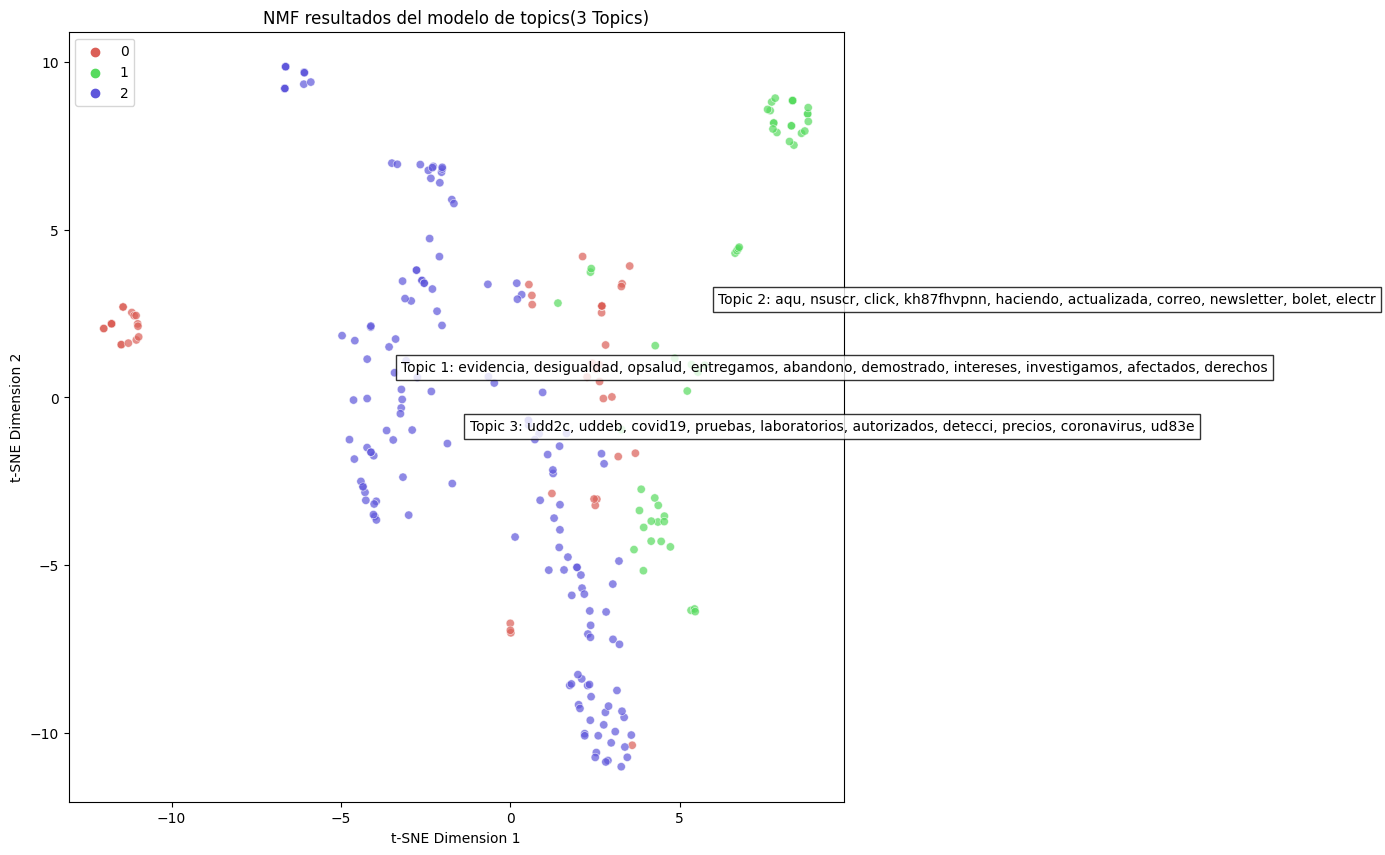

In [ ]:
top_words = []
for topic in P:
    word_idx = topic.argsort()[-10:]
    top_words.append([words[idx] for idx in word_idx])

# Create scatter plot with topic colors and labels
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    hue=Q.argmax(axis=1), # Color-code points by their assigned topic
    palette=sns.color_palette("hls", nmf.n_components),
    legend="full",
    alpha=0.7
)

# Add topic labels to plot
for i, words in enumerate(top_words):
    label = "Topic {}: {}".format(i+1, ", ".join(words))
    x_pos = tsne_results[Q.argmax(axis=1) == i, 0].mean()
    y_pos = tsne_results[Q.argmax(axis=1) == i, 1].mean()
    plt.text(x_pos, y_pos, label, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.title("NMF resultados del modelo de topics({} Topics)".format(nmf.n_components))
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

Análisis



##LA REPUBLICA

In [ ]:
df1

,id,text,created_at,author,type,metrics,texto_respuesta,inicio_politician
0,"""1623834034433323047""","""\ud83d\udea8 #ENVIVO | Congreso: exponen info...","""2023-02-09T23:59:37.000Z""","""829750511624679424""","""retweeted""","{'retweet_count': 2, 'reply_count': 0, 'like_c...",NaN,NaN
1,"""1623827165534994433""","""\u26bd \ud83c\udfdf \ud83e\udd29 Alianza Lim...","""2023-02-09T23:32:20.000Z""","""1478128253655203852""","""retweeted""","{'retweet_count': 2, 'reply_count': 0, 'like_c...",NaN,NaN
2,"""1623826601992458241""","""\ud83d\udea8 #VIDEO | Paro nacional: se repor...","""2023-02-09T23:30:05.000Z""","""66746614""","""original""","{'retweet_count': 13, 'reply_count': 8, 'like_...",NaN,NaN
3,"""1623825483514236929""","""\ud83d\udea8 \ud83d\udcda Universidad San Mar...","""2023-02-09T23:25:39.000Z""","""66746614""","""original""","{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN
4,"""1623824846604959745""","""\ud83d\udea8 Se incendia tuber\u00eda de gas ...","""2023-02-09T23:23:07.000Z""","""66746614""","""original""","{'retweet_count': 0, 'reply_count': 0, 'like_c...",NaN,NaN
...,...,...,...,...,...,...,...,...
398649,"""682718856457142273""","""Ej\u00e9rcito da de baja a cuatro generales d...","""2016-01-01T00:23:54.000Z""","""66746614""","""original""","{'retweet_count': 8, 'reply_count': 4, 'like_c...",NaN,NaN
398650,"""682716428680704000""","""RT@OcioLaRepublica Lorena \u00c1lvarez silenc...","""2016-01-01T00:14:15.000Z""","""66746614""","""original""","{'retweet_count': 1, 'reply_count': 4, 'like_c...",NaN,NaN
398651,"""682715070107893762""","""RT @DeportesLR: #Universitario de Deportes y ...","""2016-01-01T00:08:51.000Z""","""66746614""","""original""","{'retweet_count': 0, 'reply_count': 2, 'like_c...",NaN,NaN
398652,"""682712934955544578""","""Olinda Casta\u00f1eda 'amenaza' a sus detract...","""2016-01-01T00:00:22.000Z""","""66746614""","""original""","{'retweet_count': 2, 'reply_count': 1, 'like_c...",NaN,NaN


###FILTRO general para stopwords, minusculas,etc.
- elimar acentos
-se caracteres
-se convierte a minuscula
-se cargan y eliminan stop words

In [ ]:
def clean_accents(tweet): #la función "clean_accents" reemplaza caracteres acentuados en un tweet.
    tweet = re.sub(r"[àáâãäå]", "a", tweet)
    tweet = re.sub(r"ç", "c", tweet)
    tweet = re.sub(r"[èéêë]", "e", tweet)
    tweet = re.sub(r"[ìíîï]", "i", tweet)
    tweet = re.sub(r"[òóôõö]", "o", tweet)
    tweet = re.sub(r"[ùúûü]", "u", tweet)
    tweet = re.sub(r"[ýÿ]", "y", tweet)
    #tweet = re.sub(r"[\u00ed]", "i", tweet)

    return tweet



In [ ]:
#para reemplazar varios caracteres de puntuación por espacios en blanco
f1 = lambda x: re.sub('[,\.!?:/@"]', ' ', x)

#convierte a una cadena de texto en minúsculas.
f2 = lambda x: str(x).lower()



In [ ]:
nuevos_stopwords = ['https', 'rt', 't', 'co', 'htp']
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop= stopwords.words("spanish")
#stop.extend(['https', 'rt', 't', 'co', 'htp'])
stop.extend(nuevos_stopwords)
stop = [word.lower() for word in stop]
f3 = lambda x: ' '.join(w for w in x.split() if w.lower() not in stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
df1['text'] = df1['text'].astype(str)

In [ ]:
def remove_words(text):
    pattern = r'\b\w*[aeiou][0-9]\w*\b'  # elimina palabras que contienen una vocal+número
    return re.sub(pattern, '', text)

# Aplicar la función a la columna 'col2'
df1['text'] = df1['text'].apply(remove_words)

In [ ]:
f4 = lambda x: ' '.join(w for w in x.split() if len(w)>3) #dividir en palabras individuales

In [ ]:
df1['text'] = df1['text'].str.replace('\n', ' ') #" se eliminan las ocurrencias de nueva línea

In [ ]:
#se eliminan los parentesis teniendo como resultado una nueva columna con texto limpio
df1['text_clean'] = df1['text'].str.replace('\(', " ", regex=True).str.replace('\)', " ", regex=True)

In [ ]:
#elimando caracteres especiales como \)\[\]‐#@
df1['text_clean'] = df1['text_clean'].str.replace('[\)\[\]‐#@]', " ", regex=True)

In [ ]:
df1['text_clean'] = df1['text_clean'].str.replace('\u26a0', '')
df1['text_clean'] = df1['text_clean'].str.replace('nhttps', '')


In [ ]:
#se aplican las funciones excepto la f1
df1['text_clean'] =df1['text_clean'].apply(f2).apply(f3).apply(f4).apply(clean_accents).apply(remove_words) #apply(f1)

In [ ]:
#se aplican todas ahora sí
df1['text_clean'] =df1['text_clean'].apply(f1).apply(f2).apply(f3).apply(f4).apply(clean_accents).apply(remove_words)

In [ ]:
df1[['text','text_clean']] #se muestra la tabla del df con el texto antes y otro despues

,text,text_clean
0,"""\ud83d\ #ENVIVO | Congreso: exponen informe f...",\ud83d\ envivo congreso exponen informe final ...
1,"""\ \ud83c\udfdf \ud83e\udd29 Alianza Lima: \ ...",\ud83c\udfdf \ud83e\udd29 alianza lima nuevas ...
2,"""\ud83d\ #VIDEO | Paro nacional: se reporta fu...",\ud83d\ video paro nacional reporta fuerte con...
3,"""\ud83d\ \ud83d\udcda Universidad San Marcos o...",\ud83d\ \ud83d\udcda universidad marcos ofrece...
4,"""\ud83d\ Se incendia tuber\ de gas natural en ...",\ud83d\ incendia tuber\ natural chiclayo decen...
...,...,...
398649,"""Ej\ da de baja a cuatro generales de las prom...",baja cuatro generales promociones ollanta anta...
398650,"""RT@OcioLaRepublica Lorena \ silencia a trols ...",ociolarepublica lorena silencia trols criticab...
398651,"""RT @DeportesLR: #Universitario de Deportes y ...",deporteslr universitario deportes problema die...
398652,"""Olinda Casta\ 'amenaza' a sus detractores por...",olinda casta\ 'amenaza' detractores laien55xuv


###delimitando periodo
se ha creido conveniente delimitar el periodo de los tweets desde el 2021 - 2023.

In [ ]:
df1.info () #que caracteres tiene nuestro df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398654 entries, 0 to 398653
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 398653 non-null  object
 1   text               398654 non-null  object
 2   created_at         398653 non-null  object
 3   author             398653 non-null  object
 4   type               398653 non-null  object
 5   metrics            398654 non-null  object
 6   texto_respuesta    1905 non-null    object
 7   inicio_politician  1 non-null       object
 8   text_clean         398654 non-null  object
dtypes: object(9)
memory usage: 27.4+ MB


In [ ]:
print(df1.iloc[100]['created_at']) #para ver una fecha


"2023-02-09T16:13:42.000Z"


In [ ]:
df1['created_at'] = pd.to_datetime(df1['created_at'], #cambiando el formato a fecha
format='"%Y-%m-%dT%H:%M:%S.%fZ"')
#"2023-02-09T23:07:08.000Z"

In [ ]:
print(df1.iloc[100]['created_at']) #viendo un ejemplo de la fecha

2023-02-09 16:13:42


In [ ]:
#se aplica el filtro desde el 2021 (abarca todo el 2021 hasta 09 de febrero de 2023)
fecha_filtro = pd.to_datetime('2021-01-01 00:00:00')
df1_filtrado1 = df1.loc[df1['created_at'] >= fecha_filtro]

In [ ]:
#se muestra la tabla del df filtrado por fechas con el texto antes y otro despues
df1_filtrado1[['text','text_clean','created_at']]
#tiene 137412 teewts

,text,text_clean,created_at
0,"""\ud83d\ #ENVIVO | Congreso: exponen informe f...",\ud83d\ envivo congreso exponen informe final ...,2023-02-09 23:59:37
1,"""\ \ud83c\udfdf \ud83e\udd29 Alianza Lima: \ ...",\ud83c\udfdf \ud83e\udd29 alianza lima nuevas ...,2023-02-09 23:32:20
2,"""\ud83d\ #VIDEO | Paro nacional: se reporta fu...",\ud83d\ video paro nacional reporta fuerte con...,2023-02-09 23:30:05
3,"""\ud83d\ \ud83d\udcda Universidad San Marcos o...",\ud83d\ \ud83d\udcda universidad marcos ofrece...,2023-02-09 23:25:39
4,"""\ud83d\ Se incendia tuber\ de gas natural en ...",\ud83d\ incendia tuber\ natural chiclayo decen...,2023-02-09 23:23:07
...,...,...,...
137407,"""AMLO plantea que mujeres decidan en consulta ...",amlo plantea mujeres decidan consulta popular ...,2021-01-01 01:01:16
137408,"""#LO\ | Gobernador Llemp\ anunci\ que ma\ empi...",gobernador llemp\ anunci\ empieza mesa trabaja...,2021-01-01 00:47:50
137409,"""Puno es la quinta regi\ en el pa\ con m\ conf...",puno quinta regi\ conflictos sociales seg\ def...,2021-01-01 00:23:17
137410,"""Empresario captura a delincuente que encontr\...",empresario captura delincuente encontr\ roband...,2021-01-01 00:08:06


###filtro por palabras
con el filtro de tiempo aplicado se llegan a tener 137412 elementos.
El diario La Republica denomina a su herramienta de fact checking como "VerificadorLR", por lo cual será esta denomicación con que se aplicará este filtro usando verificadorlr, ya que se ha convertido el df a minusculas.



In [ ]:
lista_terminos_2=["verificadorlr"] #crando una lista de términos
#lista_terminos=["Factchecking"]
#con esto se aplica el filtro con el objeto lista
filtro_palbras = df1_filtrado1["text_clean"].str.contains("|".join(lista_terminos_2))
#se crea la columna con el filtro de palabras
df1_filtrado2 = df1_filtrado1[filtro_palbras]


In [ ]:
#se muestra la tabla del df filtrado por fechas y términos con el texto antes y otro despues
df1_filtrado2[['text','text_clean','created_at']]

,text,text_clean,created_at
39,"""#VerificadorLR | (1/8) \ im\ muestran a los '...",verificadorlr muestran 'ponchos rojos' bolivia...,2023-02-09 21:11:31
178,"""\\, estas im\ no corresponden a las protestas...",corresponden protestas dina boluarte 2023\n ve...,2023-02-09 01:47:19
190,"""\ video, en el que \ desprende la fachada\ de...",video desprende fachada\ edificio grabado lueg...,2023-02-08 23:32:08
260,"""\\: foto de ni\ no fue capturada tras el reci...",foto capturada tras reciente terremoto 2023\n ...,2023-02-08 15:58:32
516,"""\, video del mar sali\ no fue grabado tras el...",video sali\ grabado tras terremoto turqu\ 2017...,2023-02-07 00:27:55
...,...,...,...
137145,"""\ud83d\udc49No, el aborto no \""arrebata\"" la ...",\ud83d\udc49no aborto arrebata\ vida ni\\ desl...,2021-01-03 16:15:13
137221,"""\ falso que Rafael Santos gestion\ la compra ...",falso rafael santos gestion\ compra vacunas ve...,2021-01-02 22:35:57
137296,"""\\ sobre la COVID-19 que circul\ en Per\ dura...",covid-19 circul\ per\ 2020\n\n verificadorlr\,2021-01-02 02:24:01
137297,"""En este art\ de #VerificadorLR, repasamos la ...",art\ verificadorlr repasamos desinformaci\ pro...,2021-01-02 02:23:59


###Necesario tokenizar

In [ ]:
tfidf = TfidfVectorizer() #se usa la libreria sklearn

In [ ]:
tfs_df2 = tfidf.fit_transform(df1_filtrado2['text_clean']) # se tokeniza

In [ ]:
#con "toarray" convierte una matriz dispersa en una matriz densa
print(tfs_df2.toarray().shape)
tfs_df2.toarray()

(1520, 5251)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#procedemos a ver los terminos que aparecen
print("Hay {} terminos en el vocabulario:".format(len(tfidf.vocabulary_)))
tfidf.vocabulary_

Hay 5251 terminos en el vocabulario:


{'verificadorlr': 4969,
 'muestran': 3198,
 'ponchos': 3716,
 'rojos': 4235,
 'bolivia': 720,
 'marchando': 2999,
 'plaza': 3684,
 'armas': 511,
 'puno': 3922,
 'fat': 2013,
 'enero': 1767,
 'falso': 2001,
 'gfcesckfce': 2208,
 'corresponden': 1225,
 'protestas': 3878,
 'dina': 1557,
 'boluarte': 726,
 '2023': 71,
 'video': 4992,
 'desprende': 1472,
 'fachada': 1983,
 'edificio': 1658,
 'grabado': 2242,
 'luego': 2933,
 'terremoto': 4599,
 'turqu': 4727,
 'foto': 2105,
 'capturada': 850,
 'tras': 4695,
 'reciente': 4066,
 'sali': 4293,
 '2017': 65,
 'tribunal': 4709,
 'supremo': 4519,
 'confirm': 1112,
 'causado': 894,
 'terapias': 4592,
 'irreparable': 2651,
 'ud83d': 4752,
 'alcalde': 360,
 'lima': 2884,
 'rafael': 4024,
 'aliaga': 376,
 'declar': 1374,
 'semana': 4349,
 'pasada': 3559,
 'santisteban': 4317,
 'falleci': 1993,
 'pedrada': 3590,
 'bas': 649,
 'reportes': 4157,
 'oficiales': 3428,
 'explicitan': 1943,
 'objeto': 3389,
 'evidencias': 1900,
 'soporte': 4451,
 'versi': 497

In [ ]:
#se hace para obtener una lista de todas las palabras, con el numero total de palabras
#La lista de palabras se almacena en "words".
words_df2 = np.array(tfidf.get_feature_names_out())
print(len(words_df2))
words_df2

5251


array(['00074', '00ch7oesul', '02vd0baowt', ..., 'zyb1depccg',
       'zyqsacy1ou', 'zzkmoeqhg4'], dtype=object)

**





In [ ]:
nmf = NMF(n_components=3, solver='mu', init='nndsvd')
# se ajusta un modelo NMF con 3 componentes para encontrar patrones latentes, que sean tres responde a la cantidad del corpus filtrado

In [ ]:
words_df2 = np.array(tfidf.get_feature_names_out()) #contiene los términos (palabras) del vocabulario generado por un modelo de ponderación TF-IDF

In [ ]:
Q = nmf.fit_transform(tfs_df2) #tiene numero de documentos y numero de componentes latentes
P = nmf.components_ #tiene numero de componentes latentes y número de términos en el vocabulario
most_likely_topic = Q.argmax(axis=1) #para encontrar el tema más probable para cada documento
for i, topic in enumerate(P): #se imprimen los 10 terminos más importantes ordenados segun su peso en el componente
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words_df2[topic.argsort()[-10:]]])))

Topic 1: sociales,redes,falsa,informaci,visto,desinformaci,tema,escuchado,semana,pregunta
Topic 2: uddd0,ud83e,verificadorlr,ud83c,explica,hilo,abrimos,udd0d,udc47,ud83d
Topic 3: enga,vacuna,muestra,viral,vacunas,video,19,covid,verificadorlr,falso


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1524: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


#Análisis:

El primer tópico hace referencia a términos relacionados con el recibimiento de “información” y lo que genera: “desinformaci[ón]”.  “escuchado” y “visto”. De aquí se puede entender que puede existir una alta comprensión de que la audiencia recibe tal contenido principalmente por redes sociales (“sociales”+“redes”). Por tanto, tienden a exponer el canal por el cual llegan las noticias falsas que se logran verificar. Esto pone en manifiesto que una de las fuentes o la principal más importantes son las redes sociales. Para la Red Ama llulla. (s.f.), también existen otros espacios como los discursivos. Asimismo, el tópico dos no parece haber sido generado con mayor relevancia pues también muestra la autorreferencia que hace a sus recursos informativos—aunque esta vez más especializado en Twitter(“hilo”)—. Por ultimo el tercer tema aborda cuestiones relacionadas a la pandemia del COVID-19, reconociendo que este ha sido un tema fundamental para abordar por el fact checking. Se centra en elementos como la “vacuna”, cuestión que fue altamente discutida por su efectividad y discutida nocividad.


In [ ]:
P.shape #temas vs palabras/tokens

(3, 5251)

In [ ]:
Q.shape #tweets vs temas

(1520, 3)

In [ ]:
#Contamos la ocurrencia de cada topic
df1_filtrado2['most_likely_topic'] = most_likely_topic
topic_counts = df1_filtrado2['most_likely_topic'].value_counts()
topic_counts

<ipython-input-964-aed8efcba782>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtrado2['most_likely_topic'] = most_likely_topic


2    1156
1     261
0     103
Name: most_likely_topic, dtype: int64

In [ ]:
# Calculate the proportion of each topic
topic_proportions2 = Q.sum(axis=0) / Q.sum()
topic_proportions2

array([0.20741566, 0.28425503, 0.50832931])

In [ ]:
Q.sum(axis=0)

array([22.92042002, 31.41153777, 56.17281483])

In [ ]:
Q.sum()

110.50477261270746

In [ ]:
# Apply t-SNE to reduce the dimensionality of the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(Q)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1520 samples in 0.001s...
[t-SNE] Computed neighbors for 1520 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1520
[t-SNE] Computed conditional probabilities for sample 1520 / 1520
[t-SNE] Mean sigma: 0.002282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.277065
[t-SNE] KL divergence after 300 iterations: 0.738941


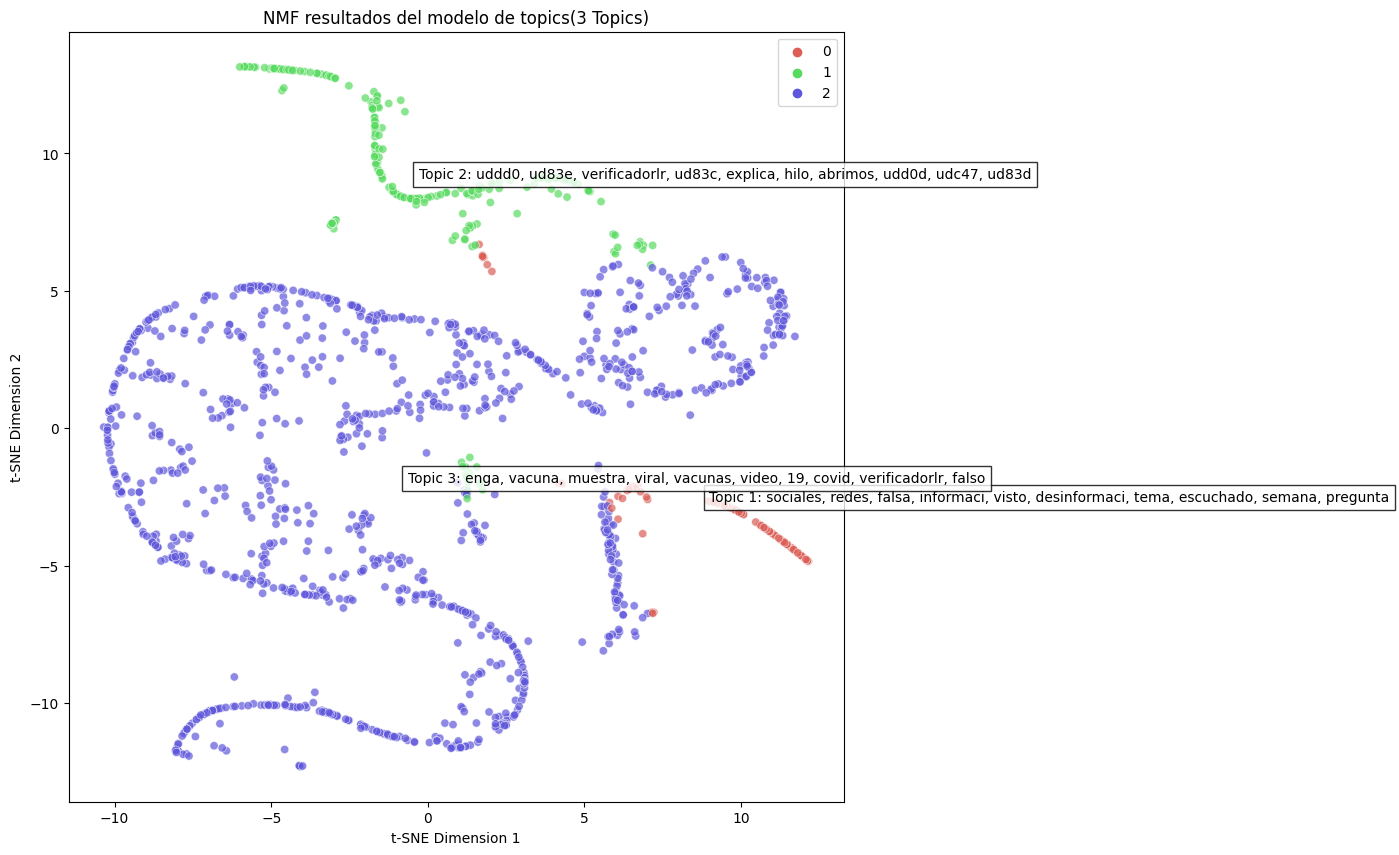

In [ ]:
top_words = []
for topic in P:
    word_idx = topic.argsort()[-10:]
    top_words.append([words_df2[idx] for idx in word_idx])

# Create scatter plot with topic colors and labels
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    hue=Q.argmax(axis=1), # Color-code points by their assigned topic
    palette=sns.color_palette("hls", nmf.n_components),
    legend="full",
    alpha=0.7
)

# Add topic labels to plot
for i, words in enumerate(top_words):
    label = "Topic {}: {}".format(i+1, ", ".join(words))
    x_pos = tsne_results[Q.argmax(axis=1) == i, 0].mean()
    y_pos = tsne_results[Q.argmax(axis=1) == i, 1].mean()
    plt.text(x_pos, y_pos, label, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.title("NMF resultados del modelo de topics({} Topics)".format(nmf.n_components))
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

###Conclusión

Se han encontrado tres puntos relevantes en el presente trabajo. En primer lugar, LR y OP se acercaron al tema sanitario con profundidad. Si bien el segundo abordó la cuestión con mayor diversidad, se destacan dos temas relacionados: la situación sanitaria y la detección del virus. Esto es coherente con el contexto de insuficiencia de información certera sobre la naturaleza del virus COVID-19, lo que probablemente dejó espacio para la propagación de noticias falsas, como se denota en el tema 1 de LR. La labor de verificación tuvo que recurrir a las redes sociales, una de las fuentes de noticias falsas. En segundo lugar, se observó un uso compartido del fact-checking para autorreferenciar los servicios que ofrecen. Esto podría deberse a que desean generar incentivos para que la audiencia siga consumiendo contenido periodístico y porque permite la generación de prestigio por la vinculación con la veracidad. En tercer lugar, no se encontró mayor alusión a temas políticos como la polarización, que fue el punto de partida de este estudio. Esto podría indicar que fue menos importante que el tema sanitario, que los medios de comunicación no realizaron mayores verificaciones en este ámbito, o que simplemente no existieron noticias falsas que confirmar. Para comprobar estas suposiciones, es necesario profundizar en el tema y subsanar ciertas limitaciones, como la falta de contraste entre los tweets abordados con el fact-checking y los que no.
En conclusión, este trabajo es un primer paso para aclarar y profundizar en ciertos aspectos, y se deben abordar las limitaciones para ampliar la investigación.



Muy interesante el trabajo. Falto un poco más de limpieza del texto. Hay terminos cortos que pudieron eliminarse en la limpieza. Por otro lado el diccionario es muy corto debiste agregar un poco más de términos en el diccionario.  Tu nota final es 18 (menos tres puntos por tardanza) 15.
